# LSP
## Liskov Substitution Principle

Пусть $q(x)$ является свойством, верным относительно объектов $x$ некоторого типа $T$. Тогда $q(y)$ также должно быть верным для объектов $y$ типа $S$, где $S$ является подтипом типа $T$.

Или же:

Объекты в программе должны быть заменяемыми на экземпляры их подтипов без изменения правильности выполнения программы.

Кратко, в частном случае этот принцип можно переформулировать на питоне так:

In [1]:
SOME_OUTPUT_1 = 1
SOME_OUTPUT_2 = 2

class T:
    def some_method_1(self):
        return SOME_OUTPUT_1

class S_LSP(T):
    def new_method_for_S(self):
        ...

class S_NotLSP(T):
    def some_method_1(self):
        return SOME_OUTPUT_2

def q(object_arg):
    result = object_arg.some_method_1()
    return result == SOME_OUTPUT_1

Для обьектов `x` и `y` соблюдение `LSP` означает следующее:

In [2]:
def does_LSP_observed(x: T, y: T):
    is_observed = (q(x) == q(y))

    if is_observed:
        print('LSP is observed for T and S')
    else:
        print('LSP is NOT observed for T and S')

In [3]:
does_LSP_observed(T(), S_LSP())

LSP is observed for T and S


In [4]:
does_LSP_observed(T(), S_NotLSP())

LSP is NOT observed for T and S


Т.е. `some_method_1`, который присутствует как в `T`, так и в `S` должны иметь абсолютно идентичное поведение.

Демонстративная картинка наследования
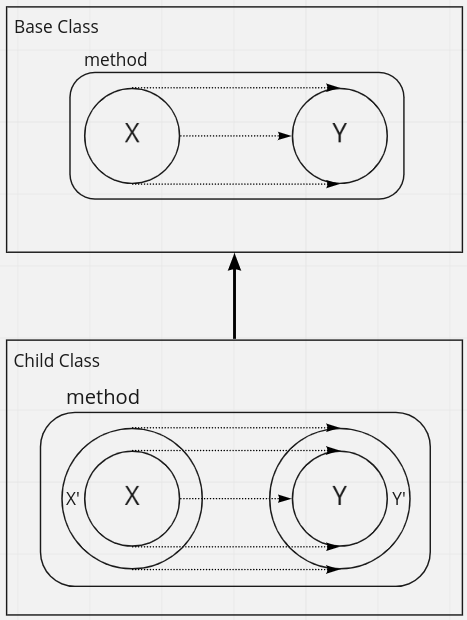

Пусть есть множество данных `X` и множество результатов `Y`, с которыми работает `Base Class`.
Тогда дочерний класс `Child Class` на множестве данных `X` должен иметь множество результатов `Y`.

____
## Реальные примеры.

Допустим мы делаем интернет магазин(`Service`). Мы решили создать сущность `User`, которая будет хранить в себе корзину пользователя.

Вначале нашей бизнес задачи нам потребовалось (или мы захотели) использовать в качестве корзины список.

* Напишем пользователя:

In [5]:
class User:
    def __init__(self, name):
        self.name = name
        self.basket = []
        
    def add_item_to_basket(self, item):
        self.basket.append(item)

* Напишем сервис магазина, который умеет добавлять предметы в корзину пользователя:

In [6]:
class Service:
    def add_item_to_user_basket(self, user: User, item):
        user.add_item_to_basket(item)

* Демонстрируем работу:

In [7]:
nikita = User('Nikita')

s = Service()
s.add_item_to_user_basket(nikita, 'Pivo')

# Момент, который возможен, но не очевиден для разработчика.
not_standart_item = ['Гель для бритья', 'Бритва']
s.add_item_to_user_basket(nikita, not_standart_item)

Мы протестировали этот функционал, им пользовались и все было классно. Внезапно мы выяснили, что нам необходима другая структура данных для корзины. А именно - словарь.

Возникает вопрос. Как это сделать с точки зрения `LCP`?

* Правильно:

In [8]:
from collections import defaultdict

class UserWithOtherBasket(User):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.new_basket = defaultdict(int)
    
    # Новый метод
    def add_item_to_new_basket(self, item):
        self.new_basket[item] += 1

In [9]:
nikita = UserWithOtherBasket('Nikita')

s = Service()
s.add_item_to_user_basket(nikita, 'Pivo')

# Момент, который возможен, но не очевиден для разработчика.
not_standart_item = ['Гель для бритья', 'Бритва']
s.add_item_to_user_basket(nikita, not_standart_item)

Да, нам потребуется менять функционал `Service`. Зато ничего не упадет, мы не потеряем деньги. И исходя из `LSP` и прочих `SOLID` принципов также внедрим функционал в `Service`, который с меньшей вероятностью упадет.

* Неправильный вариант:

In [10]:
class UserWithOtherBasket(User):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.fast_basket = defaultdict(int)
    
    # Перегрузка
    def add_item_to_basket(self, item):
        self.fast_basket[item] += 1

In [11]:
nikita = UserWithOtherBasket('Nikita')

s = Service()
s.add_item_to_user_basket(nikita, 'Pivo')

Казалось бы. И так и так работает. Зачем тогда оставлять мусорный интерфейс.

In [12]:
# Момент, который возможен, но не очевиден для разработчика.
not_standart_item = ['Гель для бритья', 'Бритва']
try:
    s.add_item_to_user_basket(nikita, not_standart_item)
except TypeError:
    print("У вас наебнулся магазин, вы потеряли бабки, пользователи от вас ушли!")

У вас наебнулся магазин, вы потеряли бабки, пользователи от вас ушли!


____
## Дополнительно про `Mixin`
Также принципы `LSP` и `Mixin` хорошо дружат.

Следующий пример довольно абстракный и глуповатый, но хорошо демонстирует мощность этих двух принципов.

Допустим нам нужны такие сущности как рука и нога, которые умеют что то делать.

In [13]:
class ArmMixin:
    def take(self, item):
        print(f'Взял {item}')
        
class LegMixin:
    def move(self, rotation, speed):
        print(f'Пошел в{rotation}, со скоростью {speed}')

Функции, работающие с миксинами, которые мы протестировали и вообще все хорошо:

In [14]:
def run_forward(leg: LegMixin):
    leg.move('перед', 'бегуна')

single_leg = LegMixin()
run_forward(single_leg)

Пошел вперед, со скоростью бегуна


In [15]:
def take_cola(arm: ArmMixin):
    arm.take('кола')

single_arm = ArmMixin()
take_cola(single_arm)

Взял кола


Также для того чтобы выступать по радио, мы сделали человека без рук и ног, который умеет только говорить.

In [16]:
class PersonWithoutLegAndArm:
    def speek(self, phrase: str):
        print(f'Человек говорить: {phrase}')

def speek_hello(person: PersonWithoutLegAndArm):
    person.speek('Привет!')

In [17]:
radio_person = PersonWithoutLegAndArm()
speek_hello(radio_person)

Человек говорить: Привет!


А теперь мы решили сделать человека с руками и ногами из человека, который умеет только говорит (дичь, конечно). И наследуясь от человека без рук и ног мы дополнительно наследуемся от миксинов рук и ног. Как бы расширяя функционал человека без рук и ног.

In [18]:
class Person(PersonWithoutLegAndArm, LegMixin, ArmMixin):
    pass

In [19]:
person = Person()

run_forward(person)
take_cola(person)
speek_hello(person)

Пошел вперед, со скоростью бегуна
Взял кола
Человек говорить: Привет!


Таким образом, мы ничего не сломали и все прежние функции могут смело работать с наследниками без дополнительных приседаний.